In [2]:
import os
import numpy as np
import pandas as pd

# Folder paths per dataset split
base_dirs = {
    "Train": "transformed/velocity.npy/Train",
    "Val": "transformed/velocity.npy/Val",
    "Test": "transformed/velocity.npy/Test"
}

# Your class labels
CLASSES = ['Non-suspicious', 'Suspicious']

# For collecting results
records = []

for split_name, base_path in base_dirs.items():
    for class_label in CLASSES:
        class_folder = os.path.join(base_path, class_label)

        if not os.path.isdir(class_folder):
            continue

        for file_name in os.listdir(class_folder):
            if not file_name.endswith(".npy"):
                continue

            file_path = os.path.join(class_folder, file_name)

            try:
                # Load velocity: shape (frames, 71, 2)
                velocity = np.load(file_path)

                # L2 norm of each landmark's movement
                norm = np.linalg.norm(velocity, axis=2)  # shape: (frames, 71)

                # Compute summary statistics
                avg_velocity = np.mean(norm)
                max_velocity = np.max(norm)
                std_velocity = np.std(norm)

                # Store result
                records.append({
                    "split": split_name,
                    "video_name": file_name.replace('.npy', ''),
                    "label": class_label,
                    "avg_velocity": avg_velocity,
                    "max_velocity": max_velocity,
                    "std_velocity": std_velocity
                })

            except Exception as e:
                print(f"Error processing {file_name}: {e}")

# Save to CSV
df = pd.DataFrame(records)
df.to_csv("velocity_summary.csv", index=False)
print("Saved to velocity_summary.csv")


Saved to velocity_summary.csv


/tmp/ipykernel_59787/1542595992.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="label", y="avg_velocity", palette="Set2")


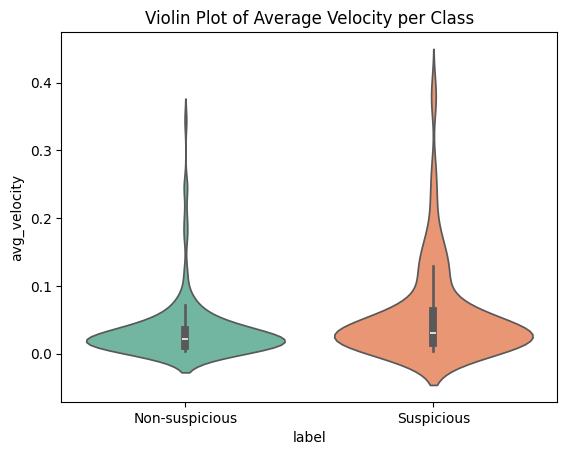

In [12]:
sns.violinplot(data=df, x="label", y="avg_velocity", palette="Set2")
plt.title("Violin Plot of Average Velocity per Class")
plt.show()


In [16]:
import pandas as pd

df = pd.read_csv("velocity_summary.csv")

print("Minimum and Maximum Average Velocity per Class:\n")

for label in df['label'].unique():
    subset = df[df['label'] == label]
    min_val = subset['avg_velocity'].min()
    max_val = subset['avg_velocity'].max()
    
    print(f"{label}:")
    print(f"  Minimum Average Velocity: {min_val:.4f}")
    print(f"  Maximum Average Velocity: {max_val:.4f}\n")


Minimum and Maximum Average Velocity per Class:

Non-suspicious:
  Minimum Average Velocity: 0.0044
  Maximum Average Velocity: 0.3443

Suspicious:
  Minimum Average Velocity: 0.0036
  Maximum Average Velocity: 0.3999



In [17]:
import os
import numpy as np
import pandas as pd

# Folder structure (same as before)
base_dirs = {
    "Train": "transformed/motion.npy/Train",
    "Val": "transformed/motion.npy/Val",
    "Test": "transformed/motion.npy/Test"
}
CLASSES = ['Non-suspicious', 'Suspicious']
records = []

# Process each video
for split_name, base_path in base_dirs.items():
    for class_label in CLASSES:
        class_folder = os.path.join(base_path, class_label)
        if not os.path.isdir(class_folder):
            continue

        for file_name in os.listdir(class_folder):
            if not file_name.endswith(".npy"):
                continue

            file_path = os.path.join(class_folder, file_name)

            try:
                motion = np.load(file_path)  # shape: (frames, 71, 2)
                norm = np.linalg.norm(motion, axis=2)  # shape: (frames, 71)
                avg_motion = np.mean(norm)
                max_motion = np.max(norm)
                std_motion = np.std(norm)

                records.append({
                    "split": split_name,
                    "video_name": file_name.replace('.npy', ''),
                    "label": class_label,
                    "avg_motion": avg_motion,
                    "max_motion": max_motion,
                    "std_motion": std_motion
                })

            except Exception as e:
                print(f"Error in {file_name}: {e}")

# Save to CSV
df = pd.DataFrame(records)
df.to_csv("motion_summary.csv", index=False)
print("Saved to motion_summary.csv")


Saved to motion_summary.csv


/tmp/ipykernel_59787/2419239709.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="label", y="avg_motion", data=df, palette="Set2")


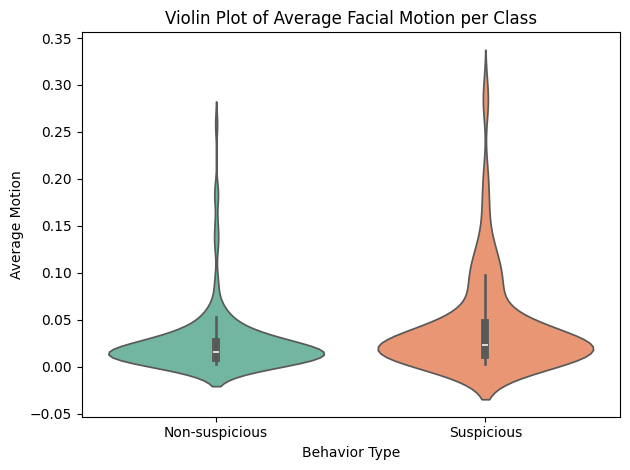

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load motion data
df = pd.read_csv("motion_summary.csv")

# Violin plot
sns.violinplot(x="label", y="avg_motion", data=df, palette="Set2")
plt.title("Violin Plot of Average Facial Motion per Class")
plt.ylabel("Average Motion")
plt.xlabel("Behavior Type")
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd

df = pd.read_csv("motion_summary.csv")

print("Minimum and Maximum Average Velocity per Class:\n")

for label in df['label'].unique():
    subset = df[df['label'] == label]
    min_val = subset['avg_motion'].min()
    max_val = subset['avg_motion'].max()
    
    print(f"{label}:")
    print(f"  Minimum Average Motion: {min_val:.4f}")
    print(f"  Maximum Average Motion: {max_val:.4f}\n")


Minimum and Maximum Average Velocity per Class:

Non-suspicious:
  Minimum Average Motion: 0.0033
  Maximum Average Motion: 0.2583

Suspicious:
  Minimum Average Motion: 0.0027
  Maximum Average Motion: 0.3000

